# Part II - (Relationship between Subscribers and Customers, and what is unique about each of them.)
## by (Victor Onoja)

## Investigation Overview

> In this investigation, I want to know how the subscribers and customers user type differ. My main focus on on the daily usage, duration and gender.


## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('fordgobike-tripdata-clean.csv')

In [3]:
# This function is used to change the count plot numbers into percentages
def plot_func(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 15, va='bottom', ha='center')

## (Subscribers and Customers daily usage)

> From our investigation, Subscribers take more daily trips than Customers with the Highest peak on Thursday followed by the rest of the week days. On weekends bike trips a less.

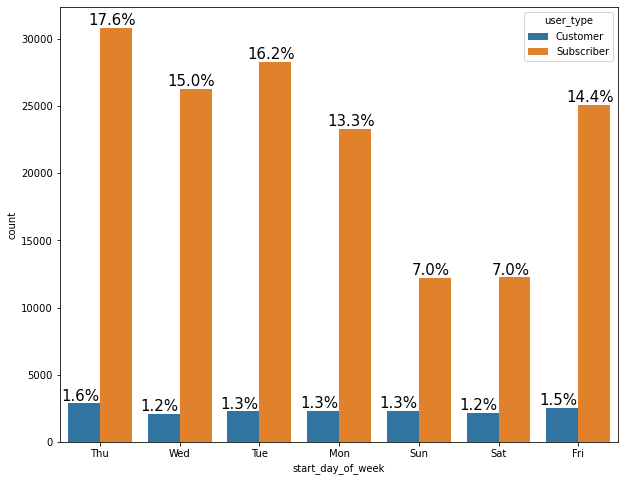

In [4]:
# user type with the start an end day
plt.figure(figsize=(10, 8))
ax = sb.countplot(data=df, x='start_day_of_week', hue='user_type');
plot_func(ax, df.start_day_of_week)

## (Subscribers and Customers trip duration)

> From this visualization, we can see that Customers have high trip durations compare to Subscribers. And this is the reason why I believe Customers are called 'Customers' in this case, it is because of their trip duration. Customers are not even up to 1/3 as much as subscribers but when they do go for a ride, their duration is above average.

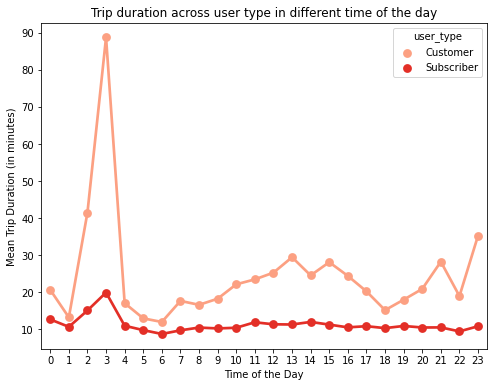

In [5]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df, x = 'start_time_of_day', y = 'duration_min', hue = 'user_type', palette = 'Reds', ci=None)
plt.title('Trip duration across user type in different time of the day')
plt.ylabel('Mean Trip Duration (in minutes)')
plt.xlabel('Time of the Day')
plt.show()

## (Subscribers and Customers across genders using FordGoBike)

> The 'other' and 'female' gender category who are 'customers' have longer trips than 'male'... Also they take most of their trips in the early time of the day roughly by 12am - 5am which further proof our '2nd Visualization' finding that shows longer trip duration happens in the early hours of the day.¶

> So basically 'other' and 'female' gender category are the major customers of FordGoBike.

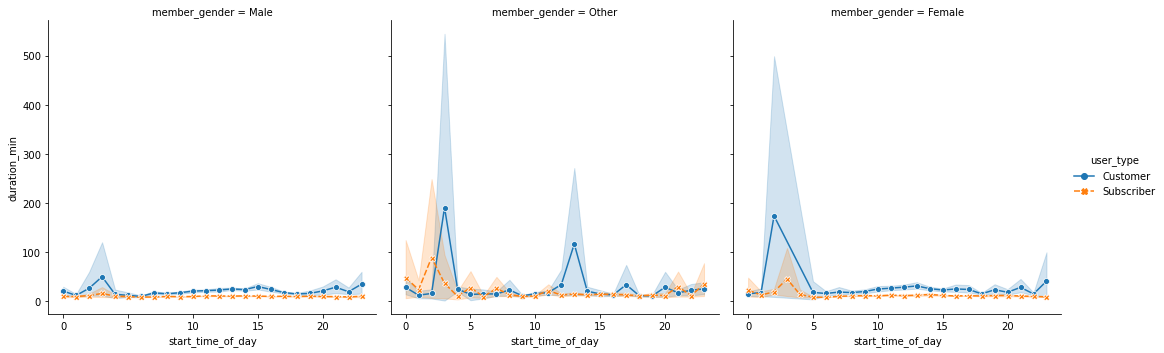

In [6]:
sb.relplot(
    data=df, kind="line",
    x="start_time_of_day", y="duration_min", col="member_gender",
    hue="user_type", style="user_type", markers=True,
)

In [9]:
!jupyter nbconvert Ford_GoBike_System_Data_Part_II.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Ford_GoBike_System_Data_Part_II.ipynb to slides
[NbConvertApp] Writing 719471 bytes to Ford_GoBike_System_Data_Part_II.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\hp\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\hp\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\hp\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\hp\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filenam